# Trabalho final das Disciplina de MATF35 - Estatística Aplicada e MATF37 - Programação em R e Python
## ECD - Especialização em Ciência de Dados e Big Data
## Aluno: Diego Cunha
---
**TEMA: Análise das prestações de contas eleitorais das eleições de 2018 e 2021**

A proposta desse trabalho é realizar a análise dos dados divulgados pelo Tribunal Superior Eleitoral (TSE) no [repositório de dados eleitorais](https://www.tse.jus.br/hotsites/pesquisas-eleitorais/prestacao_contas.html).
Com o objetivo de analisar a fase de prestação de contas da eleição federal de 2018 e a eleição municipal de 2021, a fim de verificar quanto de despesa foi gasto por partidos e candidatos na região do nordeste.

Os dados aqui utilizados para análise já passaram pela etapa de pré-processamento que foi realizada no [notebook](https://colab.research.google.com/drive/1LnFkNDUqcX_HvY2pX9kNIqfvBP0W_H6v).

Bibliotecas utilizadas:
*   **numpy**
*   **pandas**
*   **seaborn**
*   **matplotlib**



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import locale
locale.setlocale( locale.LC_ALL, '' )

def fomartar_moeda(value):
  return locale.currency(value, grouping=True)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

despesas_2018 = pd.read_csv('/content/drive/MyDrive/MATF35/dados/arquivos_processados/despesas_2018.csv')
despesas_2020 = pd.read_csv('/content/drive/MyDrive/MATF35/dados/arquivos_processados/despesas_2020.csv')

receitas_2018 = pd.read_csv('/content/drive/MyDrive/MATF35/dados/arquivos_processados/receitas_2018.csv')
receitas_2020 = pd.read_csv('/content/drive/MyDrive/MATF35/dados/arquivos_processados/receitas_2020.csv')

In [ ]:
despesas_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282007 entries, 0 to 282006
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ANO_ELEICAO            282007 non-null  int64  
 1   SQ_PRESTADOR_CONTAS    282007 non-null  int64  
 2   SG_UF                  282007 non-null  object 
 3   SG_UE                  282007 non-null  object 
 4   NM_UE                  282007 non-null  object 
 5   CD_CARGO               282007 non-null  int64  
 6   DS_CARGO               282007 non-null  object 
 7   SQ_CANDIDATO           282007 non-null  int64  
 8   NR_CANDIDATO           282007 non-null  int64  
 9   NM_CANDIDATO           282007 non-null  object 
 10  NR_PARTIDO             282007 non-null  int64  
 11  SG_PARTIDO             282007 non-null  object 
 12  NM_PARTIDO             282007 non-null  object 
 13  CD_TIPO_FORNECEDOR     282007 non-null  object 
 14  CD_CNAE_FORNECEDOR     282007 non-nu

In [ ]:
despesas_2018.head()

,ANO_ELEICAO,SQ_PRESTADOR_CONTAS,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CD_TIPO_FORNECEDOR,CD_CNAE_FORNECEDOR,DS_CNAE_FORNECEDOR,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,DT_DESPESA,VR_DESPESA_CONTRATADA,NR_MES,ELEITO
0,2018,409853809,AL,AL,ALAGOAS,6,Deputado Federal,20000600622,3000,ADELMO JOSÉ SILVA DE ASSIS,30,NOVO,Partido Novo,PJ,95118,Reparação e manutenção de computadores e de eq...,20110000,Publicidade por adesivos,21/08/2018,890.000,8,0
1,2018,409853809,AL,AL,ALAGOAS,6,Deputado Federal,20000600622,3000,ADELMO JOSÉ SILVA DE ASSIS,30,NOVO,Partido Novo,PJ,-1,#NULO#,20210000,"Encargos financeiros, taxas bancárias e/ou op....",04/09/2018,5.600,9,0
2,2018,409853809,AL,AL,ALAGOAS,6,Deputado Federal,20000600622,3000,ADELMO JOSÉ SILVA DE ASSIS,30,NOVO,Partido Novo,PJ,-1,#NULO#,20210000,"Encargos financeiros, taxas bancárias e/ou op....",24/08/2018,5.600,8,0
3,2018,409853809,AL,AL,ALAGOAS,6,Deputado Federal,20000600622,3000,ADELMO JOSÉ SILVA DE ASSIS,30,NOVO,Partido Novo,PJ,-1,#NULO#,20210000,"Encargos financeiros, taxas bancárias e/ou op....",22/08/2018,17.850,8,0
4,2018,409853809,AL,AL,ALAGOAS,6,Deputado Federal,20000600622,3000,ADELMO JOSÉ SILVA DE ASSIS,30,NOVO,Partido Novo,PJ,47814,Comércio varejista de artigos do vestuário e a...,20270000,Diversas a especificar,31/08/2018,462.000,8,0


In [ ]:
despesas_2018['VR_DESPESA_CONTRATADA'].describe()

count    279501.000
mean       2668.443
std       14538.988
min           0.010
25%         170.000
50%         521.000
75%        1699.830
max     1882000.000
Name: VR_DESPESA_CONTRATADA, dtype: float64

## Gráfico de despesas por partido em cada UF do nordeste

No gráfico abaixo podemos verificar os gastos dos candidados de cada partido na região nordeste. E como já era de se esperar os maiores gastos estão justamente nos maiores partidos e naqueles que possuem maior representatividade na câmara de deputados como também na câmara do senado.
O que possívelmente dificulta a concorrência de partidos menores, já que com menos recursos fica mais difícil competir.

### Despesas por partidos por estado das Eleições 2018

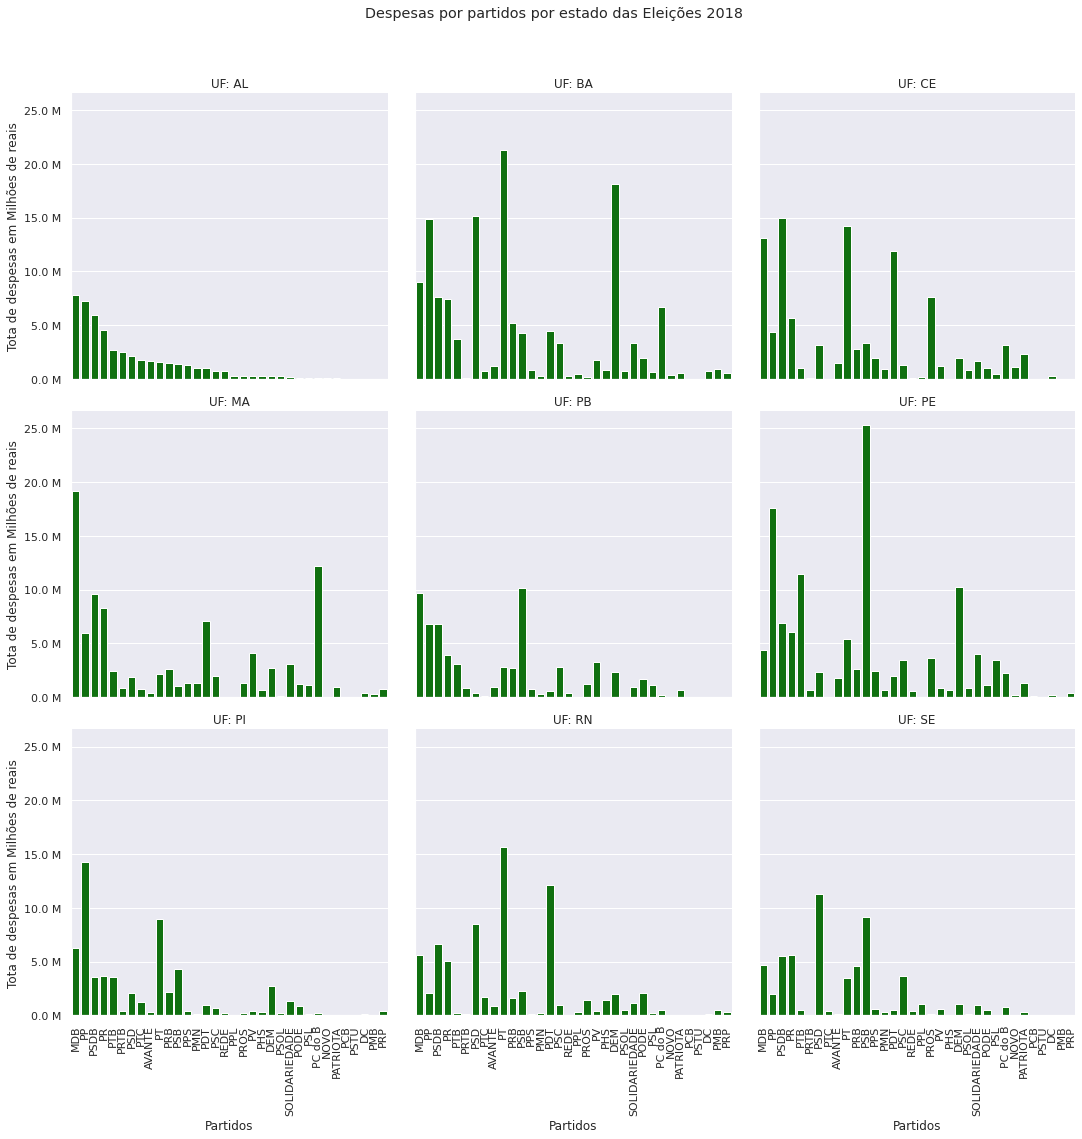

In [ ]:
yticks = np.arange(0,30000000.0,5000000)
yticks_labels = ['{} M'.format((i / 1000000)) for i in yticks]
sns.set_theme()

estados = ['AL','BA','CE','MA','PB','PE','PI','RN','SE']

dfs = []
for e in estados:
  df = despesas_2018[despesas_2018['SG_UF']==e].groupby(by=['SG_UF','SG_PARTIDO'], as_index=False)['VR_DESPESA_CONTRATADA'].sum().round(2).sort_values(by=['SG_UF','VR_DESPESA_CONTRATADA'],ascending=False)
  dfs.append(df)

despesas_partido_estado_2018 = pd.concat(dfs)

sns.set_style('darkgrid')
grf = sns.catplot(data=despesas_partido_estado_2018, x='SG_PARTIDO',y='VR_DESPESA_CONTRATADA',col='SG_UF',col_wrap=3,kind='bar',color='green');
grf.set_xticklabels(rotation=90).set_xlabels('Partidos').set_ylabels('Tota de despesas em Milhões de reais');
grf.set_titles('UF: {col_name}');
plt.yticks(yticks,yticks_labels);
grf.fig.subplots_adjust(top=0.9);
grf.fig.suptitle('Despesas por partidos por estado das Eleições 2018');
grf.savefig('/content/drive/MyDrive/MATF35/dados/imagens/partido_estado_2018.png');

### Despesas por partidos por estado das Eleições 2020

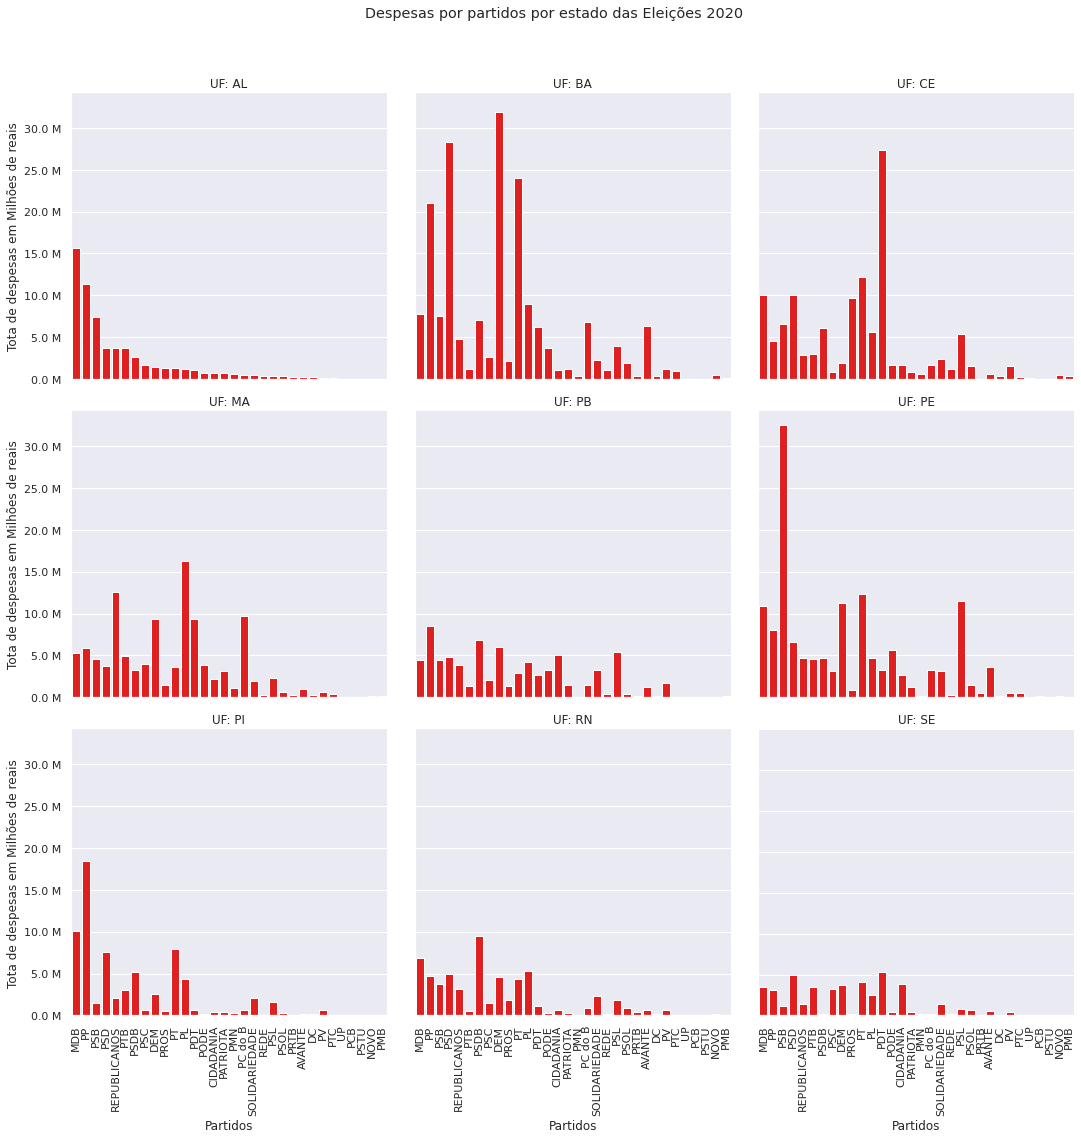

In [ ]:
yticks = np.arange(0,40000000.0,5000000)
yticks_labels = ['{} M'.format((i / 1000000)) for i in yticks]

dfs = []
for e in estados:
  df = despesas_2020[despesas_2020['SG_UF']==e].groupby(by=['SG_UF','SG_PARTIDO'], as_index=False)['VR_DESPESA_CONTRATADA'].sum().round(2).sort_values(by=['SG_UF','VR_DESPESA_CONTRATADA'],ascending=False)
  dfs.append(df)
  
despesas_partido_estado_2020 = pd.concat(dfs)

sns.set_style('darkgrid')
grf = sns.catplot(data=despesas_partido_estado_2020, x='SG_PARTIDO',y='VR_DESPESA_CONTRATADA',col='SG_UF',col_wrap=3,kind='bar',color='red');
grf.set_xticklabels(rotation=90).set_xlabels('Partidos').set_ylabels('Tota de despesas em Milhões de reais');
grf.set_titles('UF: {col_name}');
plt.yticks(yticks,yticks_labels);
grf.fig.subplots_adjust(top=0.9);
grf.fig.suptitle('Despesas por partidos por estado das Eleições 2020');
grf.savefig('/content/drive/MyDrive/MATF35/dados/imagens/partido_estado_2020.png');

## Gráfico de despesas de cargos por estado

Aqui a ideia foi agrupar os dados para os tipos de cargos que concorreram nas eleições de 2018 e 2020 e identificar no total quais cargos iriam concentrar a maior parte das despesas nas eleições.
Nas eleições de 2018 os cargos que concorreram foram Deputado Federal, Deputado Estadual, Governador e Senador. Podemos ver que a maior concentração de despesas está justamente com o cargo de Deputado Federal que possui um maior número de candidatos que em conjunto possuem os maiores recursos.
Já nas eleições de 2020 como os cargos que concorreram foram Prefeito e Vereador é facíl identificar que os candidatos a prefeitos tem maiores investimentos para a candidatura.

### Valor de despesas por cargo por estado 2018

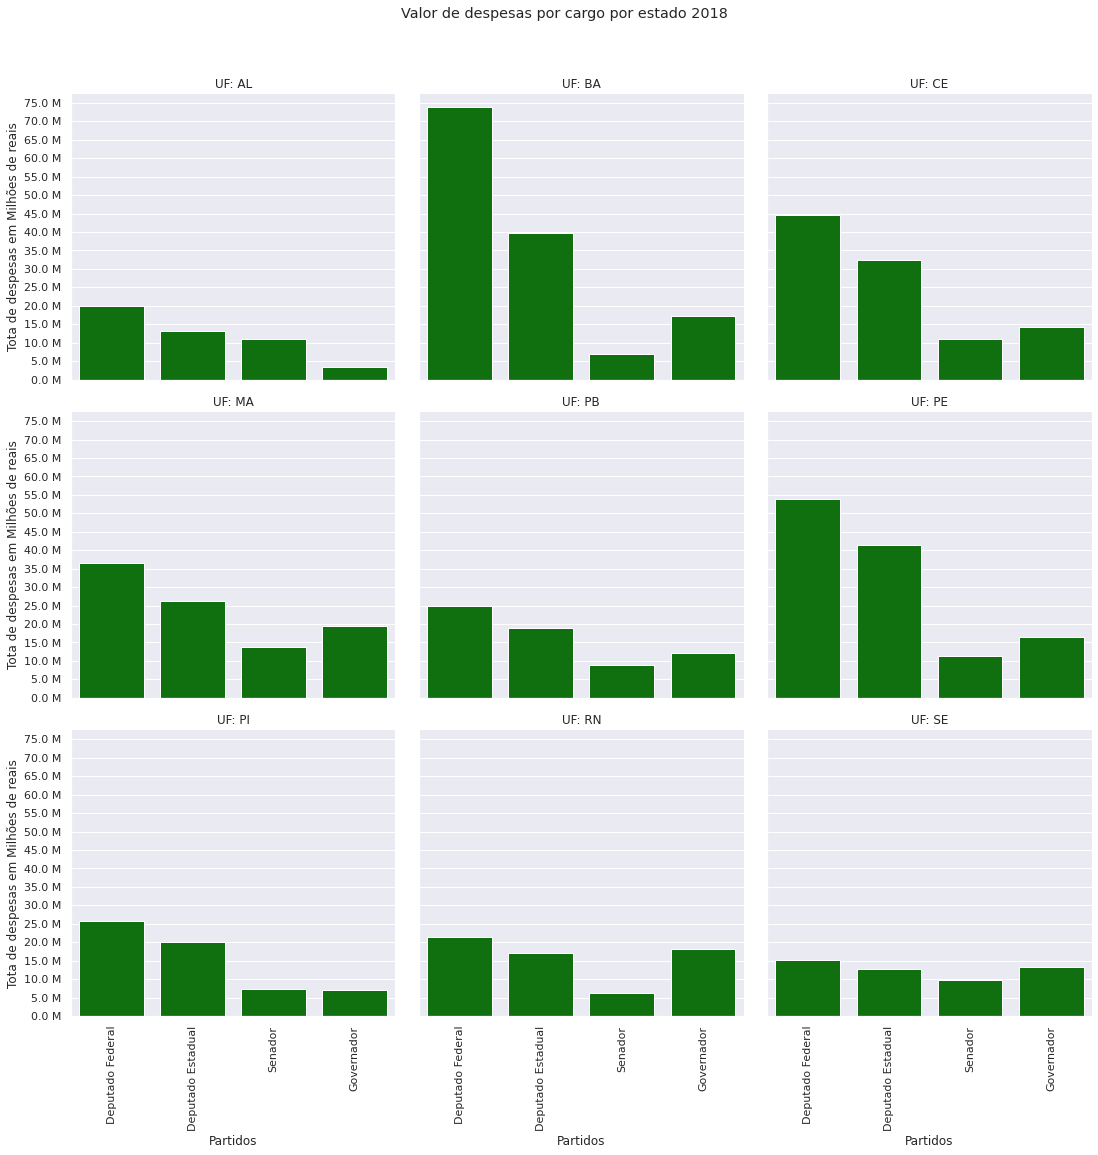

In [ ]:
yticks = np.arange(0,80000000.0,5000000)
yticks_labels = ['{} M'.format((i / 1000000)) for i in yticks]
dfs = []
for e in estados:
  df = despesas_2018[despesas_2018['SG_UF']==e].groupby(by=['SG_UF','DS_CARGO'], as_index=False)['VR_DESPESA_CONTRATADA'].sum().round(2).sort_values(by=['SG_UF','VR_DESPESA_CONTRATADA'],ascending=False)
  dfs.append(df)

despesas_partido_estado_2018 = pd.concat(dfs)

sns.set_style('darkgrid')
grf = sns.catplot(data=despesas_partido_estado_2018, x='DS_CARGO',y='VR_DESPESA_CONTRATADA',col='SG_UF',col_wrap=3,kind='bar',color='green');
grf.set_xticklabels(rotation=90).set_xlabels('Partidos').set_ylabels('Tota de despesas em Milhões de reais');
grf.set_titles('UF: {col_name}');
plt.yticks(yticks,yticks_labels);
grf.fig.subplots_adjust(top=0.9);
grf.fig.suptitle('Valor de despesas por cargo por estado 2018');
grf.savefig('/content/drive/MyDrive/MATF35/dados/imagens/cargo_estado_2018.png');

### Valor de despesas por cargo por estado 2020

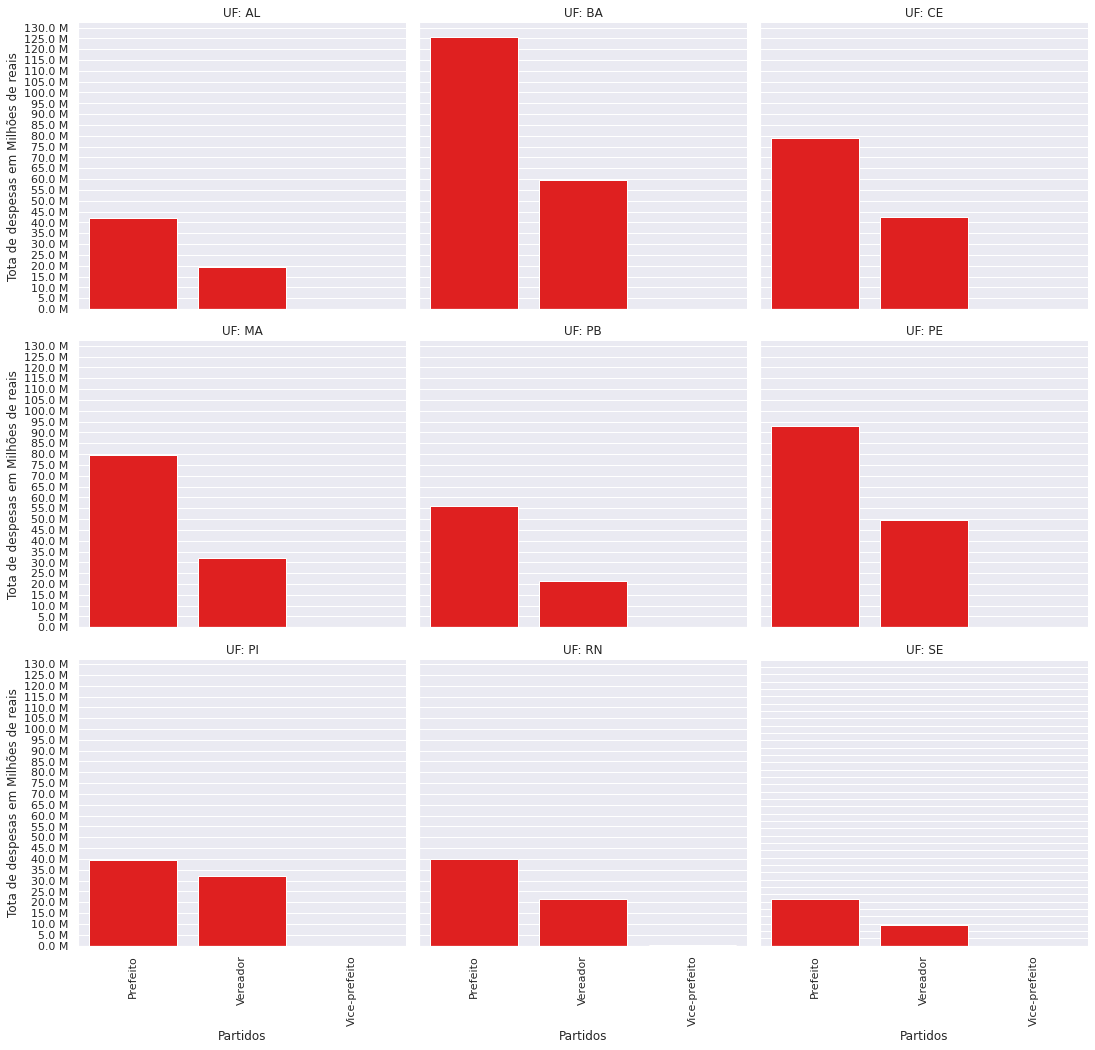

In [ ]:
yticks = np.arange(0,200000000.0,5000000)
yticks_labels = ['{} M'.format((i / 1000000)) for i in yticks]
dfs = []
for e in estados:
  df = despesas_2020[despesas_2020['SG_UF']==e].groupby(by=['SG_UF','DS_CARGO'], as_index=False)['VR_DESPESA_CONTRATADA'].sum().round(2).sort_values(by=['SG_UF','VR_DESPESA_CONTRATADA'],ascending=False)
  dfs.append(df)

despesas_partido_estado_2020 = pd.concat(dfs)

sns.set_style('darkgrid')
grf = sns.catplot(data=despesas_partido_estado_2020, x='DS_CARGO',y='VR_DESPESA_CONTRATADA',col='SG_UF',col_wrap=3,kind='bar',color='red');
grf.set_xticklabels(rotation=90).set_xlabels('Partidos').set_ylabels('Tota de despesas em Milhões de reais');
grf.set_titles('UF: {col_name}');
plt.yticks(yticks,yticks_labels);
grf.fig.subplots_adjust(top=0.9);
grf.savefig('/content/drive/MyDrive/MATF35/dados/imagens/cargo_estado_2020.png');

In [ ]:
cargos_2018 = {3: 'Governador', 5: 'Senador', 6: 'Deputado Federal', 7: 'Deputado Estadual'}
despesas_2018.groupby(by=['CD_CARGO','DS_CARGO'],as_index=False).size()

,CD_CARGO,DS_CARGO,size
0,3,Governador,19107
1,5,Senador,16654
2,6,Deputado Federal,118017
3,7,Deputado Estadual,125723


In [ ]:
cargos_2020 = {11: 'Prefeito', 12: 'Vice-prefeito', 13: 'Vereador'}
despesas_2020.groupby(by=['CD_CARGO','DS_CARGO'],as_index=False).size()

,CD_CARGO,DS_CARGO,size
0,11,Prefeito,331977
1,12,Vice-prefeito,75
2,13,Vereador,597195


## Tabela com valores de despesas contratadas por origem

Os gastos campeões são com Publicidade por materiais impresssos, Serviços prestados por terceiros e Produção de programas de rádio, televisão ou, tanto para as eleições de 2018 como em 2020.

### Tabela de despesas por origem 2018

In [ ]:
despesas_2018.groupby(by=['CD_ORIGEM_DESPESA','DS_ORIGEM_DESPESA'],as_index=False).size()
df_origem_2018 = despesas_2018.groupby(by=['CD_ORIGEM_DESPESA','DS_ORIGEM_DESPESA'],as_index=False)['VR_DESPESA_CONTRATADA'].sum().sort_values(by=['VR_DESPESA_CONTRATADA'],ascending=False)
df_origem_2018['VR_DESPESA_CONTRATADA'] = df_origem_2018['VR_DESPESA_CONTRATADA'].map(fomartar_moeda).str.replace('.','+').str.replace(',','.').str.replace('+',',').str.replace('$', 'R$ ')
df_origem_2018

,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
13,20140000,Publicidade por materiais impressos,"R$ 171.604.322,58"
11,20120000,Serviços prestados por terceiros,"R$ 120.141.420,65"
21,20220000,"Produção de programas de rádio, televisão ou v...","R$ 80.849.715,21"
10,20110000,Publicidade por adesivos,"R$ 65.076.098,04"
36,20800000,Atividades de militância e mobilização de rua,"R$ 63.321.759,61"
35,20600000,Cessão ou locação de veículos,"R$ 36.167.531,95"
23,20240000,Doações financeiras a outros candidatos/partidos,"R$ 35.187.139,20"
9,20100000,Combustíveis e lubrificantes,"R$ 30.538.992,28"
0,20010000,Despesas com pessoal,"R$ 26.568.802,09"
26,20270000,Diversas a especificar,"R$ 16.877.153,77"


### Tabela de despesas por origem 2020

In [ ]:
despesas_2020.groupby(by=['CD_ORIGEM_DESPESA','DS_ORIGEM_DESPESA'],as_index=False).size()
df_origem_2020 = despesas_2020.groupby(by=['CD_ORIGEM_DESPESA','DS_ORIGEM_DESPESA'],as_index=False)['VR_DESPESA_CONTRATADA'].sum().sort_values(by=['VR_DESPESA_CONTRATADA'],ascending=False)
df_origem_2020['VR_DESPESA_CONTRATADA'] = df_origem_2020['VR_DESPESA_CONTRATADA'].map(fomartar_moeda).str.replace('.','+').str.replace(',','.').str.replace('+',',').str.replace('$', 'R$ ')
df_origem_2020

,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
13,20140000,Publicidade por materiais impressos,"R$ 204.543.599,33"
11,20120000,Serviços prestados por terceiros,"R$ 85.711.600,37"
10,20110000,Publicidade por adesivos,"R$ 79.666.095,69"
21,20220000,"Produção de programas de rádio, televisão ou v...","R$ 70.935.193,05"
32,20360001,Serviços advocatícios,"R$ 68.421.454,57"
39,20800000,Atividades de militância e mobilização de rua,"R$ 59.018.197,59"
33,20360002,Serviços contábeis,"R$ 58.219.207,45"
9,20100000,Combustíveis e lubrificantes,"R$ 37.551.299,39"
26,20270000,Diversas a especificar,"R$ 34.527.167,92"
38,20600000,Cessão ou locação de veículos,"R$ 28.618.912,51"


In [ ]:
despesas_2018.groupby(by='DS_CARGO')['VR_DESPESA_CONTRATADA'].mean()

DS_CARGO
Deputado Estadual   1763.743
Deputado Federal    2680.476
Governador          6380.635
Senador             5153.878
Name: VR_DESPESA_CONTRATADA, dtype: float64

In [ ]:
despesas_2020.groupby(by='DS_CARGO')['VR_DESPESA_CONTRATADA'].mean()

DS_CARGO
Prefeito        1768.054
Vereador         488.763
Vice-prefeito   2016.136
Name: VR_DESPESA_CONTRATADA, dtype: float64

## Gráfico de linha para comparar as despesas das eleições de 2018 e 2020

Aqui vamos analisar a comparação das despesas das eleições de 2018 com as eleições de 2020. Podemos ver que no periodo de agosto à outubro foi o periodo do ano de 2018 que tiveram maiores gastos por parte dos candidados nesse periodo também foi onde as despesas tiveram uma maior variação de valor como podemos perceber com a área azul mais claro em volta da reta da média. E durante o restante do ano essa variação diminuiu bastante voltando a aumentar somente no mês de dezembro. Já nas eleições de 2020 os valores das despesas se mantiveram sempre em torno da média.

Essa análise foi realizada somente para o estado da Bahia para obter uma melhor visualização do gráfico.

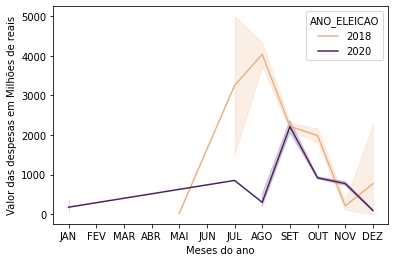

In [ ]:
df_despesa_2018 = despesas_2018.filter(['ANO_ELEICAO','SG_UF','NR_MES','VR_DESPESA_CONTRATADA']).query('SG_UF=="BA"')
df_despesa_2020 = despesas_2020.filter(['ANO_ELEICAO','SG_UF','NR_MES','VR_DESPESA_CONTRATADA']).query('SG_UF=="BA"')

grf = sns.lineplot(data=pd.concat([df_despesa_2018,df_despesa_2020]), x='NR_MES',y='VR_DESPESA_CONTRATADA', hue='ANO_ELEICAO',palette='flare',hue_norm=matplotlib.colors.LogNorm())
grf.set_xlabel('Meses do ano')
grf.set_ylabel('Valor das despesas em Milhões de reais');
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']);
grf.figure.savefig('/content/drive/MyDrive/MATF35/dados/imagens/2018_2020.png');

## Gráfico complementar ao anterior

Nos nossos dados as despesas foram relacionadas a um mês em específico no ano, para ter uma ideia da concentração das despesas dentro de um determinado mês, aqui podemos confirmar que a maior concentração das despesas está nos meses de agosto à outubro que é justamente quando se aproxima da data das eleições.

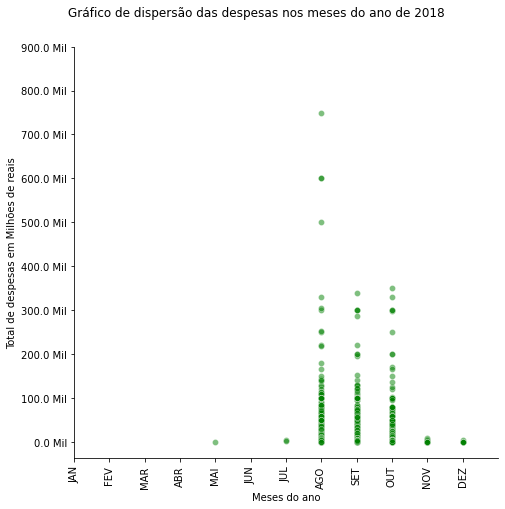

In [ ]:
yticks = np.arange(0,1000000.0,100000)
yticks_labels = ['{} Mil'.format((i / 1000)) for i in yticks]
df_despesa_2018 = despesas_2018.filter(['SG_UF','NR_MES','VR_DESPESA_CONTRATADA']).query('SG_UF=="BA"')

grf1 = sns.relplot(x="NR_MES", y="VR_DESPESA_CONTRATADA",
            sizes=(40, 400), alpha=.5, palette="muted",color='green',
            height=7, data=df_despesa_2018)

grf1.set_xticklabels(rotation=90).set_xlabels('Meses do ano').set_ylabels('Total de despesas em Milhões de reais');
plt.yticks(yticks,yticks_labels);
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']);
grf1.fig.subplots_adjust(top=0.9);
grf1.fig.suptitle('Gráfico de dispersão das despesas nos meses do ano de 2018');
grf1.figure.savefig('/content/drive/MyDrive/MATF35/dados/imagens/dispersao_2018.png');

Para as eleições de 2020 podemos observar que as despesas já se concentram dentro do intervalo de setembro à novembro, também se repetindo a proximidade com as eleições.

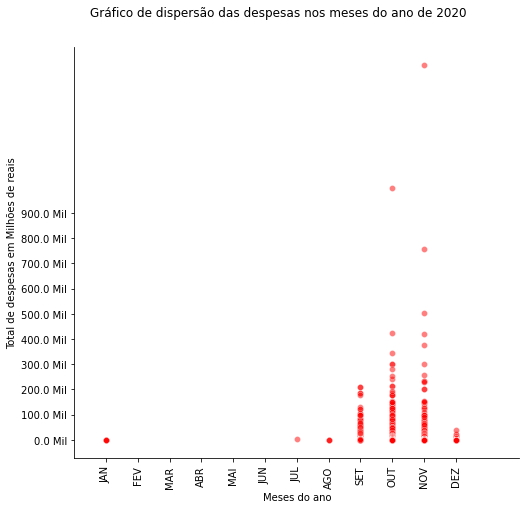

In [ ]:
yticks = np.arange(0,1000000.0,100000)
yticks_labels = ['{} Mil'.format((i / 1000)) for i in yticks]
df_despesa_2020 = despesas_2020.filter(['SG_UF','NR_MES','VR_DESPESA_CONTRATADA']).query('SG_UF=="BA"')

grf1 = sns.relplot(x="NR_MES", y="VR_DESPESA_CONTRATADA",
            sizes=(40, 400), alpha=.5, palette="muted",color='red',
            height=7, data=df_despesa_2020)

grf1.set_xticklabels(rotation=90).set_xlabels('Meses do ano').set_ylabels('Total de despesas em Milhões de reais');
plt.yticks(yticks,yticks_labels);
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']);
grf1.fig.subplots_adjust(top=0.9);
grf1.fig.suptitle('Gráfico de dispersão das despesas nos meses do ano de 2020');
grf1.figure.savefig('/content/drive/MyDrive/MATF35/dados/imagens/dispersao_2020.png');

In [ ]:
receitas_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59580 entries, 0 to 59579
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ANO_ELEICAO          59580 non-null  int64  
 1   SQ_PRESTADOR_CONTAS  59580 non-null  int64  
 2   SG_UF                59580 non-null  object 
 3   SG_UE                59580 non-null  object 
 4   NM_UE                59580 non-null  object 
 5   CD_CARGO             59580 non-null  int64  
 6   DS_CARGO             59580 non-null  object 
 7   SQ_CANDIDATO         59580 non-null  int64  
 8   NR_CANDIDATO         59580 non-null  int64  
 9   NM_CANDIDATO         59580 non-null  object 
 10  NR_PARTIDO           59580 non-null  int64  
 11  SG_PARTIDO           59580 non-null  object 
 12  NM_PARTIDO           59580 non-null  object 
 13  CD_FONTE_RECEITA     59580 non-null  int64  
 14  DS_FONTE_RECEITA     59580 non-null  object 
 15  CD_ORIGEM_RECEITA    59580 non-null 

# Análise das Receitas

As receitas informadas na prestação de contas são classificadas em 3 fontes de recursos diferentes que são: Fundo Especial, Fundo Partidário e Outros Recursos.
O Fundo Especial que conhecido como Fundo Eleitoral é o fundo composto totalmento por verbas eleitorais para ser utilizadas exclusivamente para as campanhas eleitorais. O Fundo Partidário é composto por verbas federais, recursos provenientes de multas eleitorais e doação de pessoas físicas aos partidos e ela é repassada mensalmente para os partidos politicos e Outros Recursos que entra os recurso vindo de doações de pessoas físicas, doações de partidos ou candidatos e até recursos proprios.

## Receitas por Fonte de Recursos

Para questão de análise vamos olhar para o estado da Bahia, para ter uma melhor noção das Fonte de Receitas no nosso estado.
Olhando para as eleições de 2018 podemos ver que a maior partes dos recursos são provenientes do Fundo Eleitoral e que esses recursos são mais três vezes maiores do que Outros Recursos que está como a segunda fonte com mais recursos aplicados.

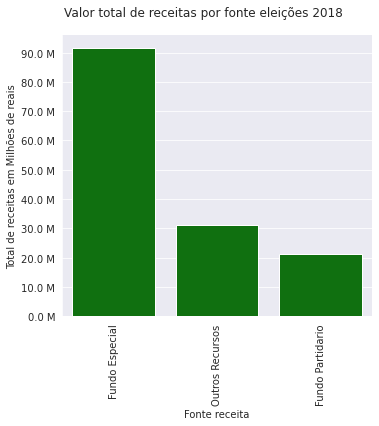

In [ ]:
yticks = np.arange(0,100000000.0,10000000)
yticks_labels = ['{} M'.format((i / 1000000)) for i in yticks]

df_receitas_2018 = receitas_2018.query('SG_UE=="BA"').groupby(by=['CD_FONTE_RECEITA','DS_FONTE_RECEITA'],as_index=False)['VR_RECEITA'].sum().round(2).sort_values(by=['VR_RECEITA'],ascending=False)
df_receitas_2018
sns.set_style('darkgrid')
grf = sns.catplot(data=df_receitas_2018, x='DS_FONTE_RECEITA',y='VR_RECEITA',kind='bar',color='green');
grf.set_xticklabels(rotation=90).set_xlabels('Fonte receita').set_ylabels('Total de receitas em Milhões de reais');
plt.yticks(yticks,yticks_labels);
grf.fig.subplots_adjust(top=0.9);
grf.fig.suptitle('Valor total de receitas por fonte eleições 2018');
grf.savefig('/content/drive/MyDrive/MATF35/dados/imagens/receitas_fonte_2018.png');

In [ ]:
df_receitas_2018 = receitas_2018.query('SG_UE=="BA"').groupby(by=['CD_FONTE_RECEITA','DS_FONTE_RECEITA'],as_index=False)['VR_RECEITA'].sum().round(2).sort_values(by=['VR_RECEITA'],ascending=False)
df_receitas_2018['VR_RECEITA'] = df_receitas_2018['VR_RECEITA'].map(fomartar_moeda).str.replace('.','+').str.replace(',','.').str.replace('+',',').str.replace('$', 'R$ ')
df_receitas_2018

,CD_FONTE_RECEITA,DS_FONTE_RECEITA,VR_RECEITA
2,2,Fundo Especial,"R$ 91.404.977,42"
1,1,Outros Recursos,"R$ 30.987.535,84"
0,0,Fundo Partidario,"R$ 21.199.479,00"


Já na eleições de 2020 podemos ver que recursos oriundos de Outros recursos aumentaram bastante ficando agora com uma diferença de 12 milhões enquanto nas eleições de 2018 essa diferença foi de três vezes o valor total dos Outros Recursos.

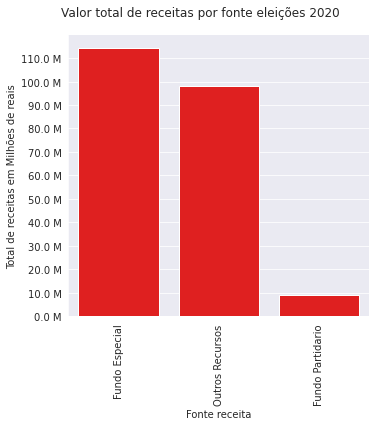

In [ ]:
yticks = np.arange(0,120000000.0,10000000)
yticks_labels = ['{} M'.format((i / 1000000)) for i in yticks]

df_receitas_2020 = receitas_2020.query('SG_UF=="BA"').groupby(by=['CD_FONTE_RECEITA','DS_FONTE_RECEITA'],as_index=False)['VR_RECEITA'].sum().round(2).sort_values(by=['VR_RECEITA'],ascending=False)
sns.set_style('darkgrid')
grf = sns.catplot(data=df_receitas_2020, x='DS_FONTE_RECEITA',y='VR_RECEITA',kind='bar',color='red');
grf.set_xticklabels(rotation=90).set_xlabels('Fonte receita').set_ylabels('Total de receitas em Milhões de reais');
plt.yticks(yticks,yticks_labels);
grf.fig.subplots_adjust(top=0.9);
grf.fig.suptitle('Valor total de receitas por fonte eleições 2020');
grf.savefig('/content/drive/MyDrive/MATF35/dados/imagens/receitas_fonte_2020.png');

In [ ]:
df_receitas_2020 = receitas_2020.query('SG_UF=="BA"').groupby(by=['CD_FONTE_RECEITA','DS_FONTE_RECEITA'],as_index=False)['VR_RECEITA'].sum().round(2).sort_values(by=['VR_RECEITA'],ascending=False)
df_receitas_2020['VR_RECEITA'] = df_receitas_2020['VR_RECEITA'].map(fomartar_moeda).str.replace('.','+').str.replace(',','.').str.replace('+',',').str.replace('$', 'R$ ')
df_receitas_2020

,CD_FONTE_RECEITA,DS_FONTE_RECEITA,VR_RECEITA
2,2,Fundo Especial,"R$ 109.521.038,35"
1,1,Outros Recursos,"R$ 97.185.933,78"
0,0,Fundo Partidario,"R$ 9.202.242,37"


## Receitas por Origem

Aqui estamos avaliando a classifcação por origem das despesas que é a informação direta de onde vem o recurso, e aqui vemos claramente o retrato do gráfico anterio de fonte onde percebemos que os recursos vindos de partidos politicos são extremamante maiores do que os outros, e isso ocorre principalmente na eleição de 2018.

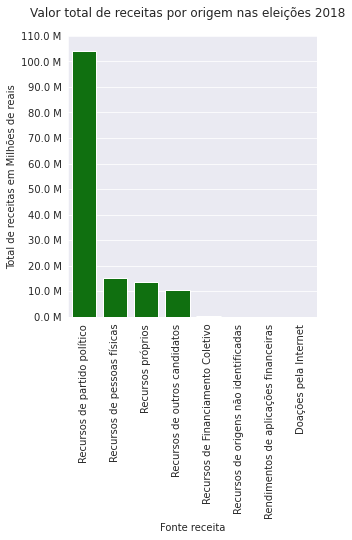

In [ ]:
df_receitas_2018 = receitas_2018.query('SG_UF=="BA"').groupby(by=['CD_ORIGEM_RECEITA','DS_ORIGEM_RECEITA'],as_index=False)['VR_RECEITA'].sum().round(2).sort_values(by=['VR_RECEITA'],ascending=False)
sns.set_style('darkgrid')
grf = sns.catplot(data=df_receitas_2018, x='DS_ORIGEM_RECEITA',y='VR_RECEITA',kind='bar',color='green');
grf.set_xticklabels(rotation=90).set_xlabels('Fonte receita').set_ylabels('Total de receitas em Milhões de reais');
plt.yticks(yticks,yticks_labels);
grf.fig.subplots_adjust(top=0.9);
grf.fig.suptitle('Valor total de receitas por origem nas eleições 2018');
grf.savefig('/content/drive/MyDrive/MATF35/dados/imagens/receitas_origem_2018.png');

In [ ]:
df_receitas_2018 = receitas_2018.query('SG_UF=="BA"').groupby(by=['CD_ORIGEM_RECEITA','DS_ORIGEM_RECEITA'],as_index=False)['VR_RECEITA'].sum().round(2).sort_values(by=['VR_RECEITA'],ascending=False)
df_receitas_2018['VR_RECEITA'] = df_receitas_2018['VR_RECEITA'].map(fomartar_moeda).str.replace('.','+').str.replace(',','.').str.replace('+',',').str.replace('$', 'R$ ')
df_receitas_2018

,CD_ORIGEM_RECEITA,DS_ORIGEM_RECEITA,VR_RECEITA
3,10020000,Recursos de partido político,"R$ 103.948.721,99"
1,10010200,Recursos de pessoas físicas,"R$ 15.197.411,92"
0,10010100,Recursos próprios,"R$ 13.576.089,59"
7,10040000,Recursos de outros candidatos,"R$ 10.458.098,28"
4,10020500,Recursos de Financiamento Coletivo,"R$ 369.698,06"
6,10030300,Recursos de origens não identificadas,"R$ 37.710,20"
5,10030200,Rendimentos de aplicações financeiras,"R$ 2.411,72"
2,10010400,Doações pela Internet,"R$ 1.850,50"


Já nas eleições de 2020 podemos ver que recursos advindos de pessoas físicas cresceram bastante, mas o que faz mais a diferença são realmente os recursos de partidos politicos que são das fontes de recrusos do Fundo Eleitoral.
Desta forma vemos que hoje os recursos do Fundo Eleitoral é de extrema importancia para as campanhas dos candidatos, mas será que realmente é necessaria, ou poderia de alguma forma diminuir esse tipo de recurso para ser aproveitado em outras areas mais importantes do nosso país.

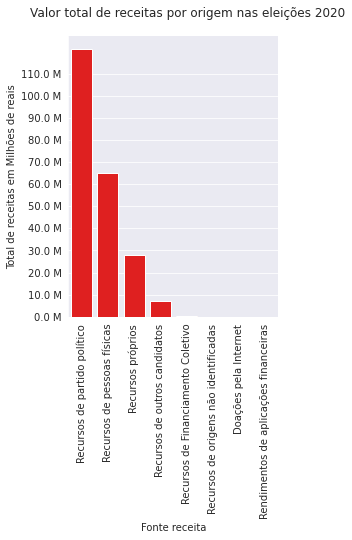

In [ ]:
df_receitas_2020 = receitas_2020.query('SG_UF=="BA"').groupby(by=['CD_ORIGEM_RECEITA','DS_ORIGEM_RECEITA'],as_index=False)['VR_RECEITA'].sum().round(2).sort_values(by=['VR_RECEITA'],ascending=False)
sns.set_style('darkgrid')
grf = sns.catplot(data=df_receitas_2020, x='DS_ORIGEM_RECEITA',y='VR_RECEITA',kind='bar',color='red');
grf.set_xticklabels(rotation=90).set_xlabels('Fonte receita').set_ylabels('Total de receitas em Milhões de reais');
plt.yticks(yticks,yticks_labels);
grf.fig.subplots_adjust(top=0.9);
grf.fig.suptitle('Valor total de receitas por origem nas eleições 2020');
grf.savefig('/content/drive/MyDrive/MATF35/dados/imagens/receitas_origem_2020.png');

In [ ]:
df_receitas_2020 = receitas_2020.query('SG_UF=="BA"').groupby(by=['CD_ORIGEM_RECEITA','DS_ORIGEM_RECEITA'],as_index=False)['VR_RECEITA'].sum().round(2).sort_values(by=['VR_RECEITA'],ascending=False)
df_receitas_2020['VR_RECEITA'] = df_receitas_2020['VR_RECEITA'].map(fomartar_moeda).str.replace('.','+').str.replace(',','.').str.replace('+',',').str.replace('$', 'R$ ')
df_receitas_2020

,CD_ORIGEM_RECEITA,DS_ORIGEM_RECEITA,VR_RECEITA
3,10020000,Recursos de partido político,"R$ 121.112.885,77"
1,10010200,Recursos de pessoas físicas,"R$ 65.020.385,52"
0,10010100,Recursos próprios,"R$ 27.715.931,71"
7,10040000,Recursos de outros candidatos,"R$ 7.192.921,14"
4,10020500,Recursos de Financiamento Coletivo,"R$ 458.080,84"
6,10030300,Recursos de origens não identificadas,"R$ 57.885,88"
2,10010400,Doações pela Internet,"R$ 45.335,34"
5,10030200,Rendimentos de aplicações financeiras,"R$ 18,55"


## Onde os eleitos gastam mais

Aqui iremos fazer uma análise de onde os candidados que foram eleitos gastaram seus recursos, para ter uma ideia de qual seria o perfil de gastos de quem foi eleito dentro de uma eleição.
Nas eleições de 2018 podemos ver que os candidatos eleitos gastaram R$ 50.312.643,95 em Publicidade por materiais impressos que são aqueles santinhos e todo material impresso que é utilizado para publicidade da campanhado do cadidato. Aqui hoje está um grande problema que é causado atualmente em nossas eleições, que é a sujeira deixa nas ruas após o periodo das eleições. Entendo que essa verba poderia ser muito melhor utilizada em marketing digital e propaganda em outras midias ou até mesmo parte do dinheiro publico chega através dos Fundos Partidarios e Fundo Eleitoral seja revestidos em outras áreas como saúde e educação.

In [170]:
despesas_eleitos_2018 = despesas_2018.query('ELEITO==1').groupby(by=['SQ_CANDIDATO','NM_CANDIDATO','CD_ORIGEM_DESPESA','DS_ORIGEM_DESPESA'],as_index=False)['VR_DESPESA_CONTRATADA'].sum()

# lista de ids dos eleitos
sq_candidatos = despesas_eleitos_2018['SQ_CANDIDATO'].unique()

def candidatos_eleito_maiores_origens():
  df_rows = []
  for cand in sq_candidatos:
    df_rows.append(despesas_eleitos_2018[despesas_eleitos_2018['VR_DESPESA_CONTRATADA']==despesas_eleitos_2018.query('SQ_CANDIDATO=={}'.format(cand))['VR_DESPESA_CONTRATADA'].max()])
  return pd.concat(df_rows)

df_eleitos_2018 = candidatos_eleito_maiores_origens()
df_eleitos_2018_final = df_eleitos_2018.groupby(by=['CD_ORIGEM_DESPESA','DS_ORIGEM_DESPESA'],as_index=False)['VR_DESPESA_CONTRATADA'].sum().sort_values('VR_DESPESA_CONTRATADA',ascending=False)
df_eleitos_2018_final['VR_DESPESA_CONTRATADA'] = df_eleitos_2018_final['VR_DESPESA_CONTRATADA'].map(fomartar_moeda).str.replace('.','+').str.replace(',','.').str.replace('+',',').str.replace('$', 'R$ ')
df_eleitos_2018_final


,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
11,20140000,Publicidade por materiais impressos,"R$ 50.312.643,95"
17,20220000,"Produção de programas de rádio, televisão ou v...","R$ 33.053.405,80"
9,20120000,Serviços prestados por terceiros,"R$ 23.418.703,04"
18,20240000,Doações financeiras a outros candidatos/partidos,"R$ 14.756.572,60"
26,20800000,Atividades de militância e mobilização de rua,"R$ 10.617.332,20"
8,20110000,Publicidade por adesivos,"R$ 9.437.644,35"
0,20010000,Despesas com pessoal,"R$ 5.029.353,03"
25,20600000,Cessão ou locação de veículos,"R$ 2.153.191,00"
24,20420000,Despesa com Impulsionamento de Conteúdos,"R$ 2.120.500,00"
2,20050000,Despesas com transporte ou deslocamento,"R$ 1.720.860,00"


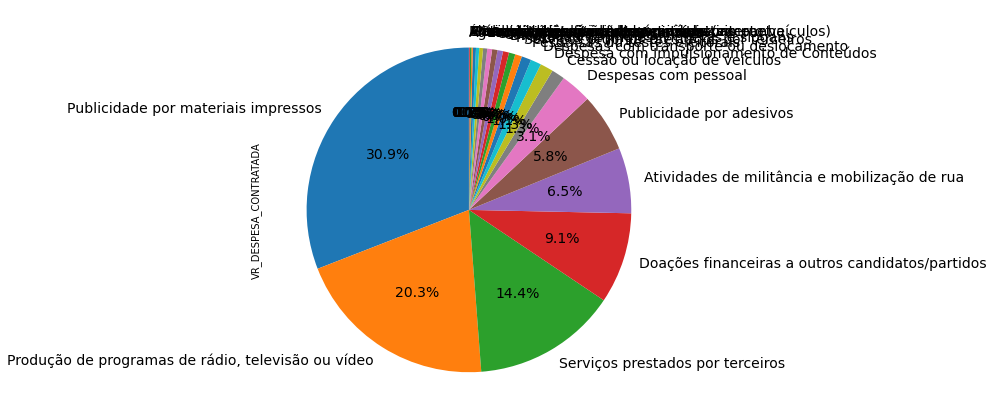

In [169]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_eleitos_2018_final.plot(kind='pie', y='VR_DESPESA_CONTRATADA', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_eleitos_2018_final['DS_ORIGEM_DESPESA'], legend = False, fontsize=14)


In [171]:
despesas_eleitos_2020 = despesas_2020.query('ELEITO==1').groupby(by=['SQ_CANDIDATO','NM_CANDIDATO','CD_ORIGEM_DESPESA','DS_ORIGEM_DESPESA'],as_index=False)['VR_DESPESA_CONTRATADA'].sum()

# lista de ids dos eleitos
sq_candidatos = despesas_eleitos_2020['SQ_CANDIDATO'].unique()

def candidatos_eleito_maiores_origens():
  df_rows = []
  for cand in sq_candidatos:
    df_rows.append(despesas_eleitos_2020[despesas_eleitos_2020['VR_DESPESA_CONTRATADA']==despesas_eleitos_2020.query('SQ_CANDIDATO=={}'.format(cand))['VR_DESPESA_CONTRATADA'].max()])
  return pd.concat(df_rows)

df_eleitos_2020 = candidatos_eleito_maiores_origens()
df_eleitos_2020_final = df_eleitos_2020.groupby(by=['CD_ORIGEM_DESPESA','DS_ORIGEM_DESPESA'],as_index=False)['VR_DESPESA_CONTRATADA'].sum().sort_values('VR_DESPESA_CONTRATADA',ascending=False)
df_eleitos_2020_final['VR_DESPESA_CONTRATADA'] = df_eleitos_2020_final['VR_DESPESA_CONTRATADA'].map(fomartar_moeda).str.replace('.','+').str.replace(',','.').str.replace('+',',').str.replace('$', 'R$ ')
df_eleitos_2020_final

,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
33,20360002,Serviços contábeis,"R$ 1.932.457.564,60"
32,20360001,Serviços advocatícios,"R$ 1.919.459.048,42"
29,20310000,"Produção de jingles, vinhetas e slogans","R$ 1.318.328.140,22"
13,20140000,Publicidade por materiais impressos,"R$ 872.948.130,96"
11,20120000,Serviços prestados por terceiros,"R$ 459.602.441,50"
10,20110000,Publicidade por adesivos,"R$ 433.884.514,75"
37,20600000,Cessão ou locação de veículos,"R$ 386.371.166,75"
21,20220000,"Produção de programas de rádio, televisão ou v...","R$ 376.079.561,34"
3,20040000,Locação/cessão de bens imóveis,"R$ 345.125.364,20"
38,20800000,Atividades de militância e mobilização de rua,"R$ 332.710.372,29"


## **Quanto** gasta de despesas em média os eleitos por cargo

In [4]:
# soma total por cargo
df_despesa_2018 = despesas_2018.query('ELEITO==1').groupby(by=['SQ_CANDIDATO','CD_CARGO','DS_CARGO'],as_index=False)['VR_DESPESA_CONTRATADA'].sum()
df_despesa_2018 = despesas_2018.groupby(by=['CD_CARGO','DS_CARGO'],as_index=False)['VR_DESPESA_CONTRATADA'].sum()

# contagem de candidatos por cargo
df_count_2018 = despesas_2018.query('ELEITO==1').groupby(by=['SQ_CANDIDATO','CD_CARGO','DS_CARGO'],as_index=False)['VR_DESPESA_CONTRATADA'].sum()
df_count_2018 = despesas_2018.groupby(by=['CD_CARGO','DS_CARGO'],as_index=False)['VR_DESPESA_CONTRATADA'].count()

df_count_2018.rename(columns={'VR_DESPESA_CONTRATADA': 'COUNT'}, inplace = True)

df_media_2018 = pd.merge(df_despesa_2018, df_count_2018.filter(['CD_CARGO','COUNT']),on=['CD_CARGO'])
df_media_2018['MEDIA'] = df_media_2018['VR_DESPESA_CONTRATADA']/df_media_2018['COUNT']
df_media_2018

,CD_CARGO,DS_CARGO,VR_DESPESA_CONTRATADA,COUNT,MEDIA
0,3,Governador,142109309.680,21613,6575.177
1,5,Senador,85832690.540,16654,5153.878
2,6,Deputado Federal,316341765.360,118017,2680.476
3,7,Deputado Estadual,221743095.990,125723,1763.743


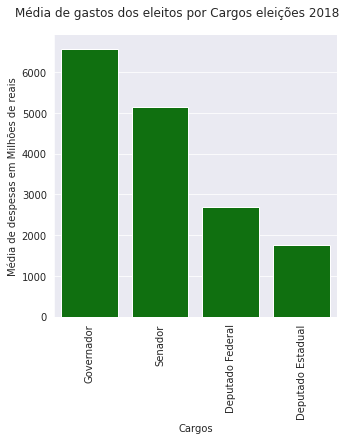

In [7]:
sns.set_style('darkgrid')
grf = sns.catplot(data=df_media_2018, x='DS_CARGO',y='MEDIA',kind='bar',color='green');
grf.set_xticklabels(rotation=90).set_xlabels('Cargos').set_ylabels('Média de despesas em Milhares de reais');
grf.fig.subplots_adjust(top=0.9);
grf.fig.suptitle('Média de gastos dos eleitos por Cargos eleições 2018');
grf.savefig('/content/drive/MyDrive/MATF35/dados/imagens/eleitos_cargos_2018.png');

In [12]:
# soma total por cargo
df_despesa_2020 = despesas_2020.query('ELEITO==1').groupby(by=['SQ_CANDIDATO','CD_CARGO','DS_CARGO'],as_index=False)['VR_DESPESA_CONTRATADA'].sum()
df_despesa_2020 = despesas_2020.groupby(by=['CD_CARGO','DS_CARGO'],as_index=False)['VR_DESPESA_CONTRATADA'].sum()

# contagem de candidatos por cargo
df_count_2020 = despesas_2020.query('ELEITO==1').groupby(by=['SQ_CANDIDATO','CD_CARGO','DS_CARGO'],as_index=False)['VR_DESPESA_CONTRATADA'].sum()
df_count_2020 = despesas_2020.groupby(by=['CD_CARGO','DS_CARGO'],as_index=False)['VR_DESPESA_CONTRATADA'].count()

df_count_2020.rename(columns={'VR_DESPESA_CONTRATADA': 'COUNT'}, inplace = True)
df_count_2020.drop(df_count_2020[df_count_2020['CD_CARGO']==12].index,inplace=True)

df_media_2020 = pd.merge(df_despesa_2020, df_count_2020.filter(['CD_CARGO','COUNT']),on=['CD_CARGO'])
df_media_2020['MEDIA'] = df_media_2020['VR_DESPESA_CONTRATADA']/df_media_2020['COUNT']
df_media_2020

,CD_CARGO,DS_CARGO,VR_DESPESA_CONTRATADA,COUNT,MEDIA
0,11,Prefeito,657547653.510,350357,1876.793
1,13,Vereador,291886908.110,597195,488.763


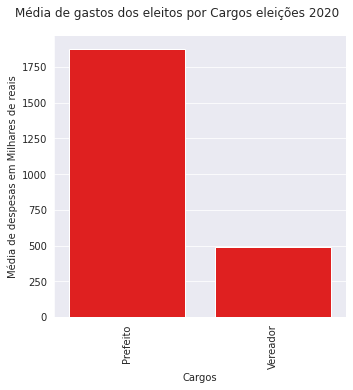

In [13]:
sns.set_style('darkgrid')
grf = sns.catplot(data=df_media_2020, x='DS_CARGO',y='MEDIA',kind='bar',color='red');
grf.set_xticklabels(rotation=90).set_xlabels('Cargos').set_ylabels('Média de despesas em Milhares de reais');
grf.fig.subplots_adjust(top=0.9);
grf.fig.suptitle('Média de gastos dos eleitos por Cargos eleições 2020');
grf.savefig('/content/drive/MyDrive/MATF35/dados/imagens/eleitos_cargos_2020.png');